Contoh data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Label unik: [0 1 2]

=== Evaluasi Model ===
Akurasi : 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


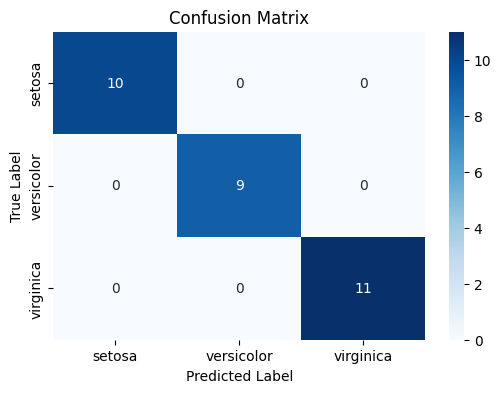


=== Koefisien Model ===
setosa: [-1.00316587  1.14487318 -1.8113482  -1.69251025]
versicolor: [ 0.52799044 -0.28319987 -0.34060665 -0.72013959]
virginica: [ 0.47517543 -0.86167331  2.15195485  2.41264984]


In [1]:
# 1. Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# 3. Cek data
print("Contoh data:\n", X.head())
print("Label unik:", np.unique(y))

# 4. Split data (training dan testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Buat dan latih model logistic regression
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# 7. Prediksi dan evaluasi
y_pred = model.predict(X_test_scaled)

print("\n=== Evaluasi Model ===")
print("Akurasi :", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 9. Coefficients dari model
print("\n=== Koefisien Model ===")
for i, class_name in enumerate(iris.target_names):
    print(f"{class_name}: {model.coef_[i]}")
